In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Load the data from “glass.csv” and make a bar plot of different types of glasses.

In [68]:
df=pd.read_csv('c:/edureka/glass.csv')


In [69]:
df.head

<bound method NDFrame.head of           RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00     1
5    1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26     1
6    1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.00  0.00     1
7    1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.00  0.00     1
8    1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.00  0.00     1
9    1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.00  0.11     1
10   1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.00  0.24     1
11   1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.00  0.00     1
12   1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.00  0.24     1
13  

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [71]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [72]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [73]:
features = df.loc[:,df.columns != 'Type']

In [74]:
corrmat = features.corr()
corrmat

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


In [75]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

# make a bar plot of different types of glasses.

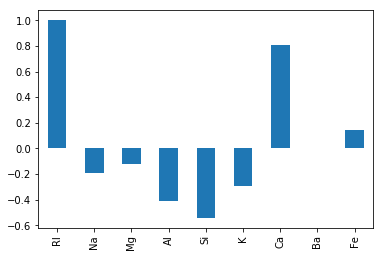

In [76]:
corrmat.iloc[0,:].plot(kind='bar')

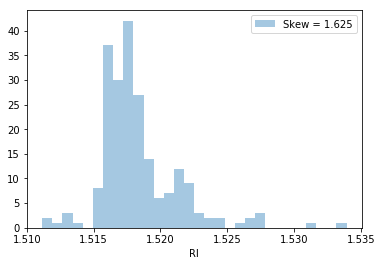

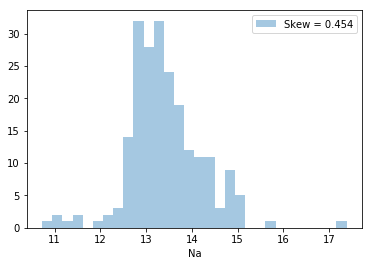

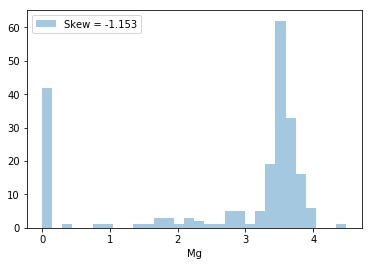

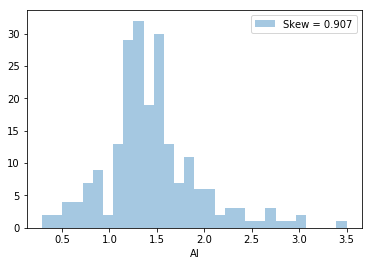

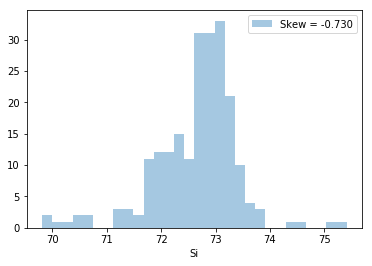

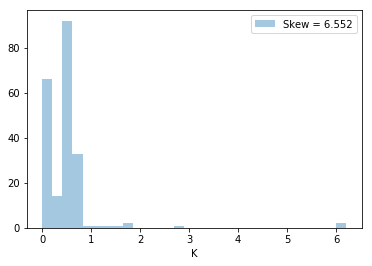

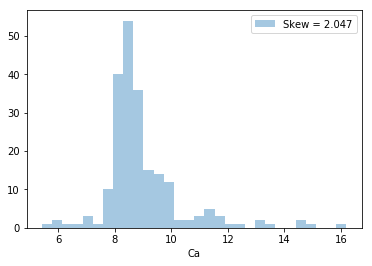

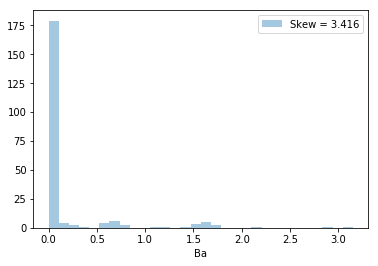

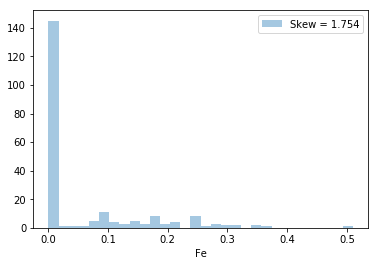

In [77]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

#now we will create a new column called target. This column will contain the values of 1 and 2.     
#1 - Bad #2 - Excellent      
#This will be split in the following way.      
#1,4 --> Bad    
#5,7 --> Excellent 

In [78]:
#Create an empty list called traget
target = []
for i in df['Type']:
    if i >= 1 and i <= 4:
        target.append('1')
    elif i >= 5 and i <= 7:
        target.append('2')
df['Target'] = target

In [79]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Target
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1,1


In [80]:
df['Target'].unique()

array(['1', '2'], dtype=object)

In [81]:
df.shape

(214, 11)

In [82]:
df.drop(['Type'],axis=1,inplace =True)
df.shape

(214, 10)

In [83]:
X= df.iloc[:,:9]
y = df['Target']

In [84]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11


In [85]:
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
184    2
185    2
186    2
187    2
188    2
189    2
190    2
191    2
192    2
193    2
194    2
195    2
196    2
197    2
198    2
199    2
200    2
201    2
202    2
203    2
204    2
205    2
206    2
207    2
208    2
209    2
210    2
211    2
212    2
213    2
Name: Target, Length: 214, dtype: object

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# 2.Make a train_test split and fit a single decision tree classifier.

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=1)

In [88]:
from sklearn.tree import DecisionTreeClassifier
dclass=DecisionTreeClassifierifier()
dclass=dclass.fit(X_train,y_train)
y_pred=dclass.predict(X_test)

# 3.Make a k-fold split with 3 splits and measure the accuracy score with each split

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9538461538461539


In [90]:
from sklearn.model_selection import KFold
from sklearn import metrics
kfold = KFold(n_splits=3)
scores = []
for train_index, test_index in kfold.split(X):
    print("KFOLD")
    print (train_index, test_index)
    abc.fit(X_train, y_train)
    print("Score",abc.score(X_test, y_test))
    

KFOLD
[ 72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Score 0.9538461538461539
KFOLD
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40

# 4.Use gridSearchCV from sklearn for finding out a suitable number of estimators for a RandomForestClassifer along with a 10-fold cross validation.

In [91]:
rfc=RandomForestClassifier(random_state=42)

In [92]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [93]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [94]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 500}

In [95]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=4, criterion='gini')

In [96]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [97]:
y_pred=rfc1.predict(X_test)

In [98]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,y_pred))

Accuracy for Random Forest on CV data:  0.9538461538461539
